# FRAUD DETECTION IN CREDIT CARD

## IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# For imbalance handling
from imblearn.over_sampling import SMOTE

import xgboost as xgb

### READING DATA

In [2]:
df=pd.read_csv(r"C:\Users\yashs\OneDrive\Desktop\creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## CLASS DISTRIBUTION ,CORRELATION HEATMAP AND BOXPLOT

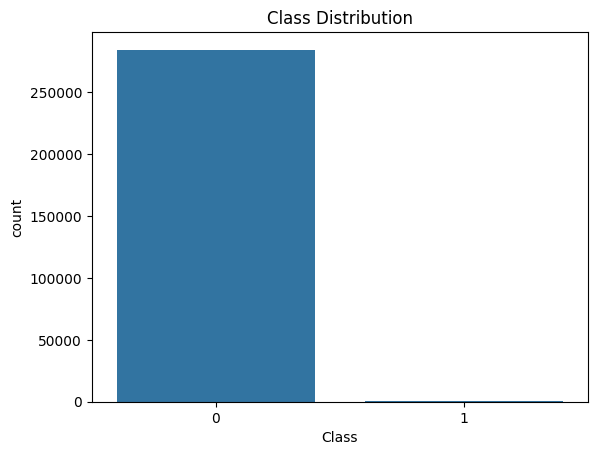

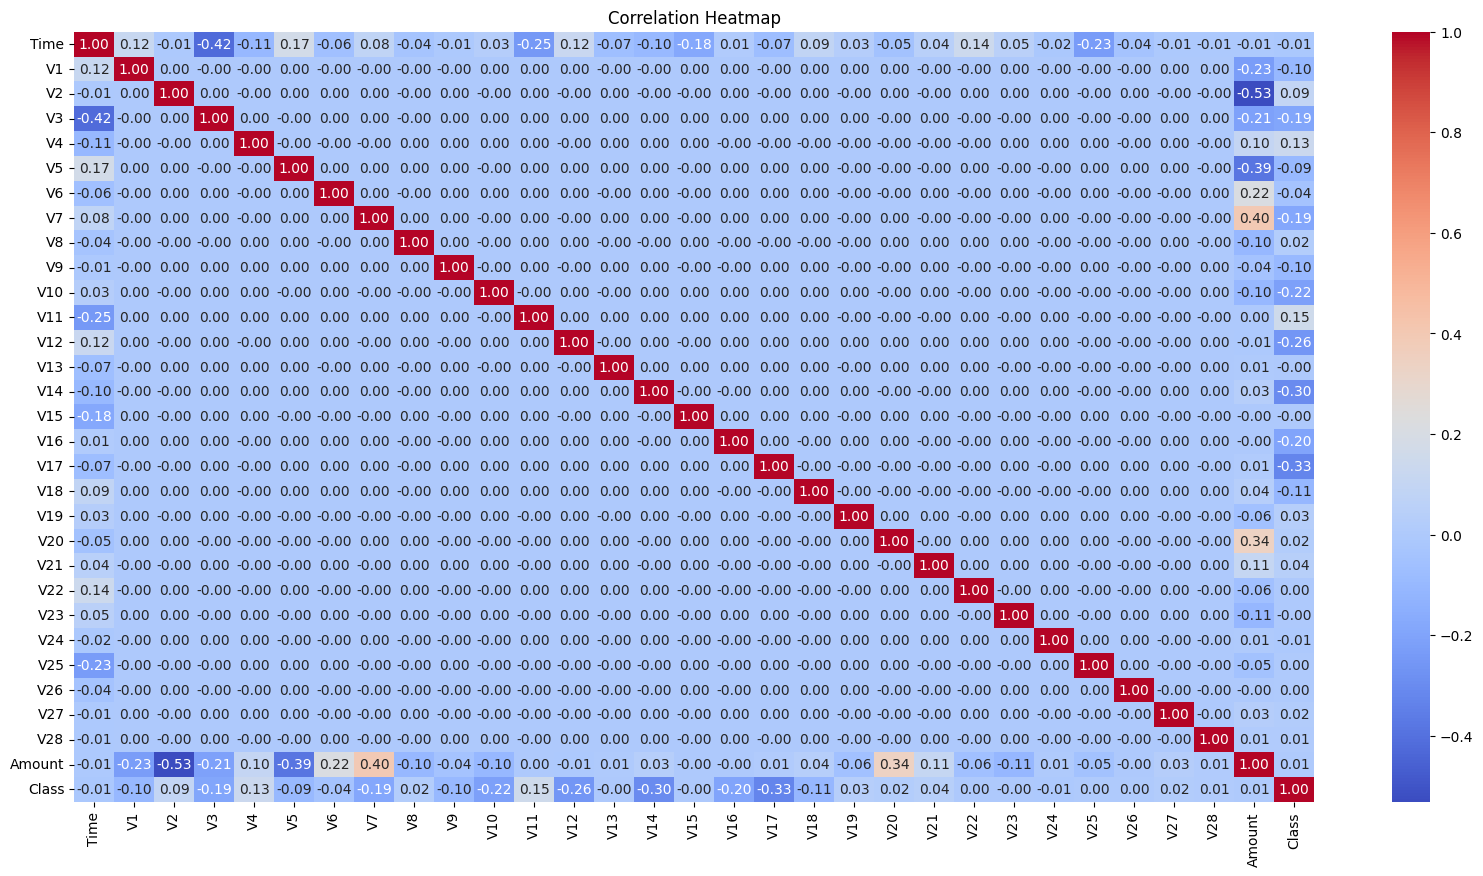

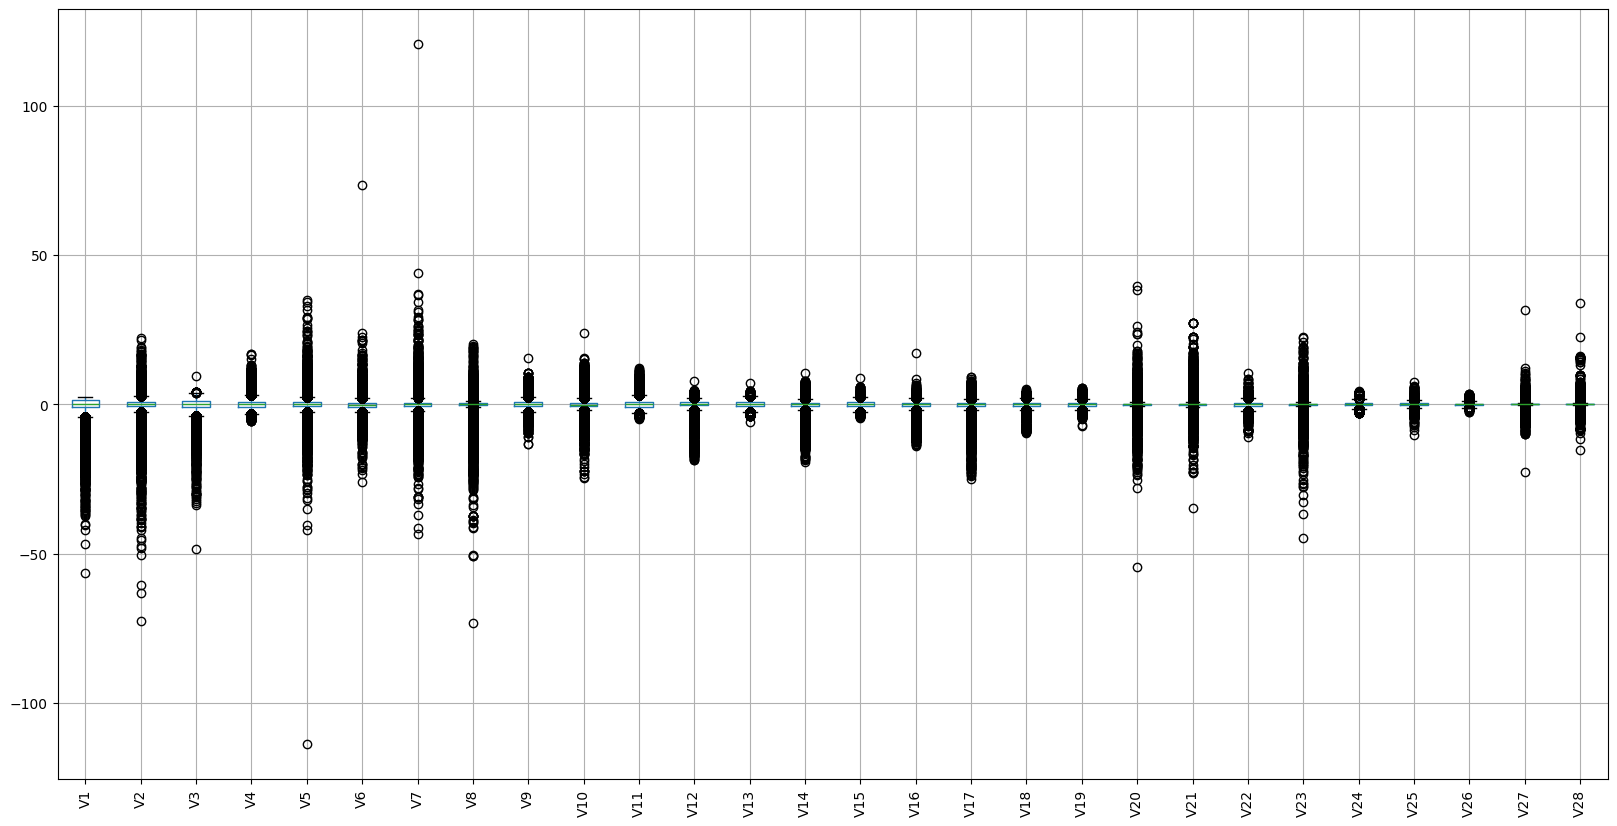

In [4]:
# Distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for features
plt.figure(figsize=(20, 10))
df.drop(['Time', 'Amount', 'Class'], axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

## HANDLING DATA IMBALANCE

In [5]:
# Using SMOTE for oversampling
smt = SMOTE(random_state=2)
x = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
x_res, y_res = smt.fit_resample(x, y)
# Convert the resampled data back into a DataFrame
df_resampled = pd.DataFrame(x_res, columns=x.columns)
df_resampled['Class'] = y_res

#  to reset the index
df_resampled.reset_index(drop=True, inplace=True)

# Print the value counts to verify
print(y.value_counts())
print(y_res.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    284315
1    284315
Name: count, dtype: int64


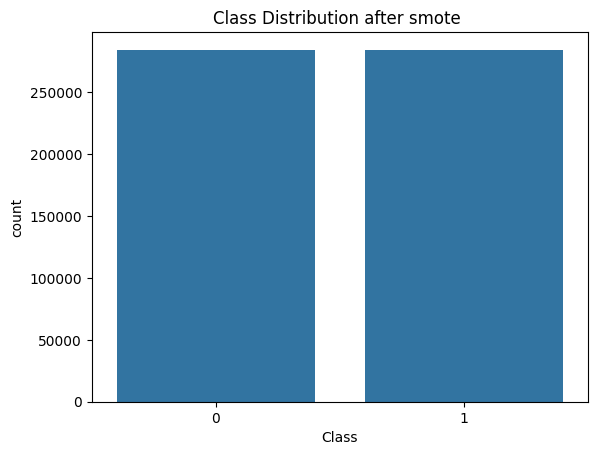

In [6]:
sns.countplot(x='Class', data=df_resampled)
plt.title('Class Distribution after smote ')
plt.show()

## FEATURE SCALING

In [7]:
# Scale features
rescaler = StandardScaler()
X_rescaled = rescaler.fit_transform(x_res)
scaler = StandardScaler()
X_standardised = scaler.fit_transform(x)

# Convert scaled features to DataFrame
X_rescaled = pd.DataFrame(X_rescaled, columns=x.columns)
X_scaled = pd.DataFrame(X_standardised, columns=x.columns)


In [8]:
X_rescaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.173703,-0.519678,0.979048,-0.272865,0.301972,0.686532,0.515541,-0.051026,0.740696,0.659784,...,0.061887,-0.142687,0.252659,-0.097477,0.233633,0.152904,-0.483705,0.036329,-0.153187,0.178184
1,0.645392,-0.425939,0.591685,-0.571297,0.399581,0.361983,0.459661,-0.053938,0.462498,0.601262,...,-0.257032,-0.219720,-0.566364,0.109155,-0.519883,0.215576,0.221998,-0.111824,-0.066784,-0.406940
2,0.173972,-0.870199,0.854311,-0.593238,0.261570,1.483749,0.612395,-0.019121,-0.103245,0.686312,...,0.334109,-0.043808,0.693972,0.897701,-1.167182,-0.587172,-0.371651,-0.160020,-0.246646,1.090298
3,0.246450,-0.550777,0.857544,-0.992133,0.382348,1.154107,0.515192,0.008668,-0.045904,0.626694,...,-0.395303,-0.176102,0.009087,-0.175389,-2.068002,0.994627,-0.557216,-0.037295,0.046079,0.074166
4,0.210965,-0.256792,0.817617,-0.585776,0.285095,0.468200,0.577554,-0.130100,0.944647,0.810143,...,0.218245,-0.139391,0.717742,-0.123807,0.371340,-0.389844,1.065227,0.125574,0.417260,-0.138929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.228847,-0.045279,-0.137239,-0.332913,0.482930,-1.021714,0.221621,0.019418,-0.046418,-0.263399,...,0.019615,0.067095,0.353035,-0.294903,0.165035,0.698715,0.209070,0.116171,-0.072264,-0.325898
568626,0.048897,0.250572,-0.082108,0.088766,-0.008256,0.183827,0.131743,0.212237,0.005966,-0.490705,...,-0.150879,0.172292,0.677723,-0.009233,0.786137,-0.203140,-0.899555,0.491170,0.267444,0.278323
568627,0.514664,0.164516,-0.286405,0.515709,-0.030834,-0.630097,-0.214682,0.165734,0.325084,-0.448954,...,0.294298,0.079643,0.041101,0.527861,-0.577676,-2.713020,0.721340,0.479652,0.146066,-0.413670
568628,0.471408,-0.441201,0.452510,0.005595,0.697665,0.099892,0.510215,-0.106073,0.049017,0.932360,...,0.016494,-0.062667,0.566798,0.268656,1.557016,-1.812613,4.836617,-0.256707,0.218253,-0.391474


## OUTLIER DETECTION UDING ISOLATION FOREST

In [9]:
from sklearn.ensemble import IsolationForest

# Isolation Forest
iso_forest = IsolationForest(contamination=0.07,random_state=2).fit(X_scaled)
y_pred_iso = iso_forest.predict(X_scaled)
print(pd.Series(y_pred_iso).value_counts())

 1    264870
-1     19937
Name: count, dtype: int64


## TRAINING LOGISTIC AND XG BOOST

In [10]:
 # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_res, test_size=0.2, random_state=2)

# Logistic Regression
lore = LogisticRegression(max_iter=1700)
lore.fit(X_train, y_train)
y_pred_lr = lore.predict(X_test)

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss',n_estimators=700)
xgb_clf.fit(X_train, y_train)
y_predxgb = xgb_clf.predict(X_test)

C:\Users\yashs\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [21:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## EVALUATION AND CONFUSION MATRIX

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56506
           1       0.98      0.94      0.96     57220

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



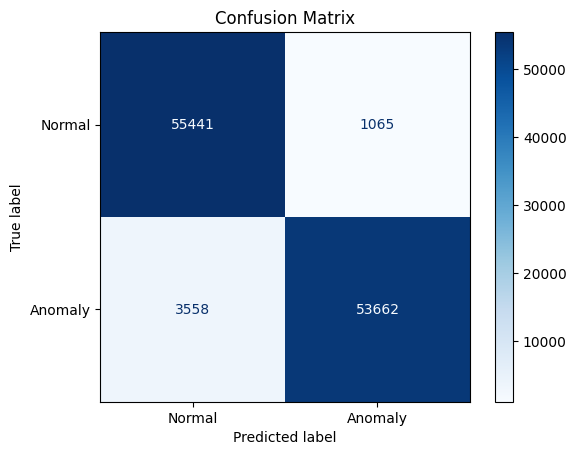

XGBoost classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56506
           1       1.00      1.00      1.00     57220

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



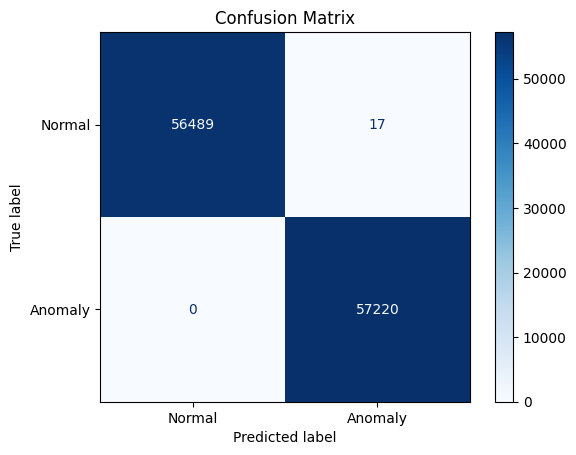

In [11]:
# Evaluation function
def evaluate_model(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
    #sns.heatmap(cm, annot=True, fmt='d')
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression Evaluation
print("Logistic Regression")
evaluate_model(y_test, y_pred_lr)

print("XGBoost classifier")
evaluate_model(y_test, y_predxgb)

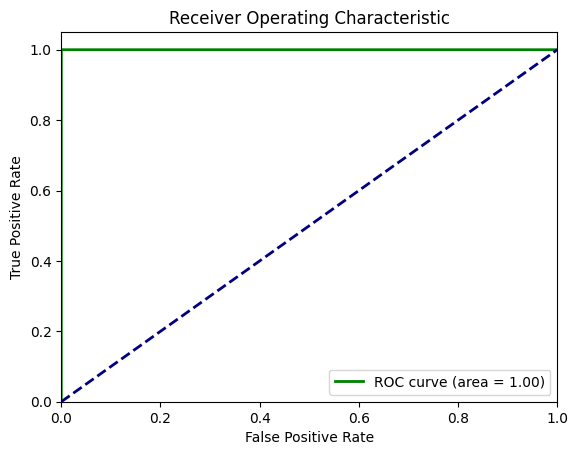

In [12]:
# ROC-AUC for XGBoost
y_pred_xgb_clf_proba = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_clf_proba)
roc_auc = roc_auc_score(y_test, y_pred_xgb_clf_proba)

plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()